<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Lytkin%20Vladimir/Netoptic_vgg16_VL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подготовка датасета и формирование набора данных также как в model_netoptik_VL.ipynb
#     https://colab.research.google.com/drive/1Yk9_ZbgTzD7Vs5wOISQwPmyKZiQi2G92?usp=sharing

In [1]:
# Загрузка датасета

# монтование GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Загрузка zip-архива с GoogleDrive на диск виртуальной машины colab
import gdown
# gdown.download('https://drive.google.com/uc?id=1FNq2k93jLoXEp7eQslg94Rd2bdWI09cj', None, quiet=True)
gdown.download('https://drive.google.com/uc?id=1JyMoZOJBwTY2MI9oFFHt4Brf3Q_ULWk5', None, quiet=True)

'glass_material_no_combi.zip'

In [3]:
# Разархивация датасета в директорию 'content/frames'
# !unzip -qo "glass_material.zip" -d /content/frames
!unzip -qo "glass_material_no_combi.zip" -d /content/frames

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/frames/'

In [4]:
# Проверка загрузки
import os
os.listdir(IMAGE_PATH)

['Металл 418', 'Пластик 500']

In [5]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 2, метки классов: ['Металл 418', 'Пластик 500']


In [6]:
# списки файлов для всех классов
for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

Металл 418 : ['bulget-bg1742-09a-s2-1 (1).jpg', 'despada-ds847-c2-s2-2 (2).jpg', 'despada-ds768-c2-s2-1 (11).jpg', 'grand-5651-c2-s2-2 (2).jpg', 'bulget-bg1636-08a-s2-1 (1).jpg', 'grand-5652-c3m-s2-2 (1).jpg', 'grand-8555-c6m-s2-1 (3).jpg', 'armani-exchange-ax1034-6103-s2-1 (17).jpg', 'despada-ds875-c2-s2-1 (3).jpg', 'grand-5650-c3m-s2-1 (42).jpg', 'grand-5599-c3-s2-2 (2).jpg', 'grand-5650-c3-s2-1 (3).jpg', 'harley-davidson-hd0770-002-s2-2 (1).jpg', 'bulget-bg1699mt-02a-s2-1 (2).jpg', 'guess-gu2605-049-s2-1 (3).jpg', 'grand-5724-c3m-s2-2 (1).jpg', 'cerruti-ce6579-c1-s2-1 (2).jpg', 'dario-martini-dm391-3-s2-1 (3).jpg', 'guess-gu1925-091-s2-1 (3).jpg', 'grand-5699-c3-s2-2 (2).jpg', 'bulget-bg1750t-01a-s2-2 (2).jpg', 'grand-5699-c6-s2-2 (2).jpg', 'bulget-bg1735-09b-s2-1 (2).jpg', 'bulget-bg1751t-12a-s2-1 (1).jpg', 'harley-davidson-hd0769-002-s2-2 (1).jpg', 'guess-gu1925-091-s2-2 (2).jpg', 'dario-martini-dm393-002-s2-1 (3).jpg', 'grand-5678-c3m-s2-2 (2).jpg', 'grand-5656-c3-s2-2 (2).jpg', 

In [7]:
#Библиотеки для отрисовки и генерации случайных чисел
from PIL import Image
import random
import matplotlib.pyplot as plt

%matplotlib inline

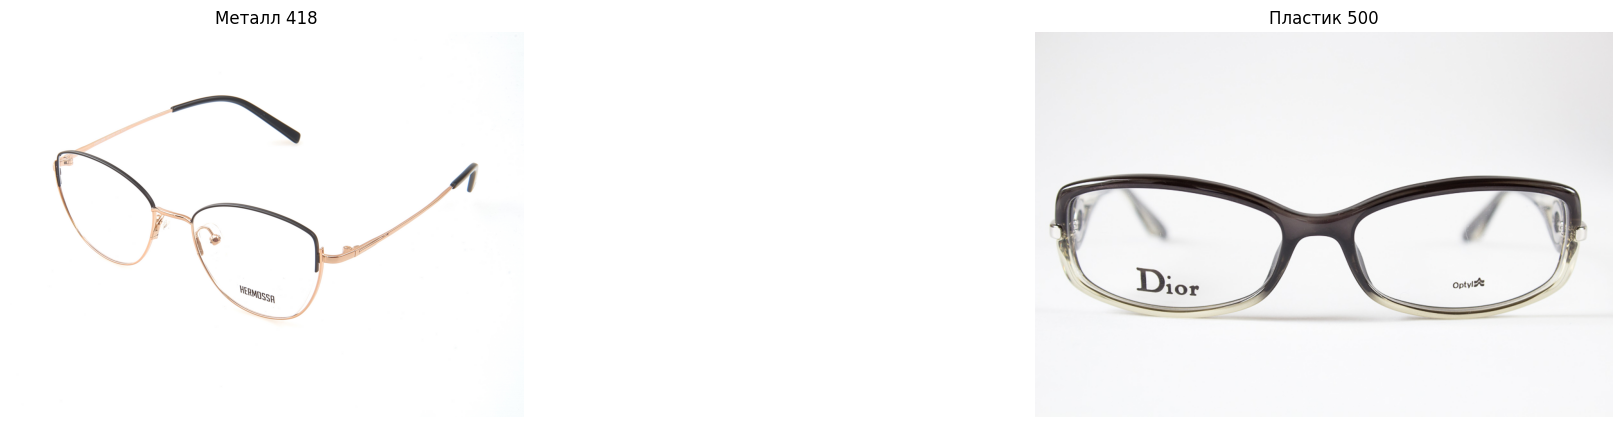

In [8]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'
    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path))
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [9]:
# Создание списков файлов и их меток класса

data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} оправ')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для обучения:', len(data_labels))
print('file=', data_files[600], ' ', 'label=', data_labels[600])

Размер класса Металл 418 составляет 418 оправ
Размер класса Пластик 500 составляет 499 оправ
Общий размер базы для обучения: 917
file= /content/frames/Пластик 500/despada-ds1004-c3-s2-1 (2).jpg   label= 1


In [27]:
# Формирование набора данных
# Задание единых размеров изображений
IMG_WIDTH = 64
IMG_HEIGHT = 128
import numpy as np

data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    img = Image.open(file_name).resize((IMG_HEIGHT, IMG_WIDTH))   # Открытие и смена размера изображения
    img_np = np.array(img)                                        # Перевод в numpy-массив
    data_images.append(img_np)                                    # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(data_images)                                    # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)                                    # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 917 фотографий следующей формы: (64, 128, 3)
Общий массив данных изображений следующей формы: (917, 64, 128, 3)
Общий массив меток классов следующей формы: (917,)


In [28]:
# Нормированние массива изображений
x_data = x_data / 255.

In [29]:
# Создание нейронной сети

# Подключение слоев
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [30]:
# Отличие от model_netoptik_VL.ipynb в подключении этого блока предобученной сети

# Библиотеки предобученной сети VGG16
from keras.applications import VGG16
# Загружаем предварительно обученную нейронную сеть
model_vgg16_trained = VGG16(weights='imagenet',                         # признаки из набора данных "ImageNet"
                            include_top=False,                          # отключаем часть "классификация", оставляем только "сверточную часть"
                            input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))     # размер тензора входных изображений

# "Замораживаем" веса предварительно обученной нейронной сети VGG16 (сверточную часть обучать не будем)
model_vgg16_trained.trainable = False
model_vgg16_trained.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 128, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 128, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 32, 128)       0     

In [31]:
# Создаем свою составную сеть на основе предобученной VGG16

model = Sequential()
# Добавляем в модель сеть VGG16 вместо слоя
model.add(model_vgg16_trained)
# Блок классификации
model.add(Flatten(name='Class_1'))
model.add(Dense(256, activation='relu', name='Class_2'))
model.add(Dropout(0.3))
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_3'))


In [32]:
# Архитектура сети
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 4, 512)         14714688  
                                                                 
 Class_1 (Flatten)           (None, 4096)              0         
                                                                 
 Class_2 (Dense)             (None, 256)               1048832   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 Class_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 15,764,034
Trainable params: 1,049,346
Non-trainable params: 14,714,688
_________________________________________________________________


In [33]:
# Далее код из model_netoptik_VL.ipynb
# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [34]:
# Обучение
store_learning = model.fit(x_data,  # ----------------- x_train, примеры набора данных
                           y_data,  # ----------------- y_train, метки примеров набора данных
                           validation_split=0.2,  # --- 0.2 - доля данных для валидационной (проверочной) выборки, 1-0.2=0.8 останется в обучающей
                           shuffle=True,  # ----------- перемешивание данных для равномерного обучения, соответствие экземпляра и метки сохраняется
                           batch_size=25,  # ---------- размер пакета, который обрабатывает нейронка перед одним изменением весов
                           epochs=10,  # -------------- epochs - количество эпох обучения
                           verbose=1)  # -------------- 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/10
30/30 [==============================] - 12s 92ms/step - loss: 0.4766 - accuracy: 0.7681 - val_loss: 0.3593 - val_accuracy: 0.8207
Epoch 2/10
30/30 [==============================] - 1s 39ms/step - loss: 0.2634 - accuracy: 0.9031 - val_loss: 0.2650 - val_accuracy: 0.8913
Epoch 3/10
30/30 [==============================] - 1s 44ms/step - loss: 0.1973 - accuracy: 0.9441 - val_loss: 0.2144 - val_accuracy: 0.8967
Epoch 4/10
30/30 [==============================] - 1s 40ms/step - loss: 0.1672 - accuracy: 0.9386 - val_loss: 0.1754 - val_accuracy: 0.9239
Epoch 5/10
30/30 [==============================] - 1s 38ms/step - loss: 0.1392 - accuracy: 0.9523 - val_loss: 0.1147 - val_accuracy: 0.9457
Epoch 6/10
30/30 [==============================] - 1s 31ms/step - loss: 0.1259 - accuracy: 0.9536 - val_loss: 0.0787 - val_accuracy: 0.9837
Epoch 7/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1107 - accuracy: 0.9659 - val_loss: 0.1078 - val_accuracy: 0.9565
Epoch 8/10
3

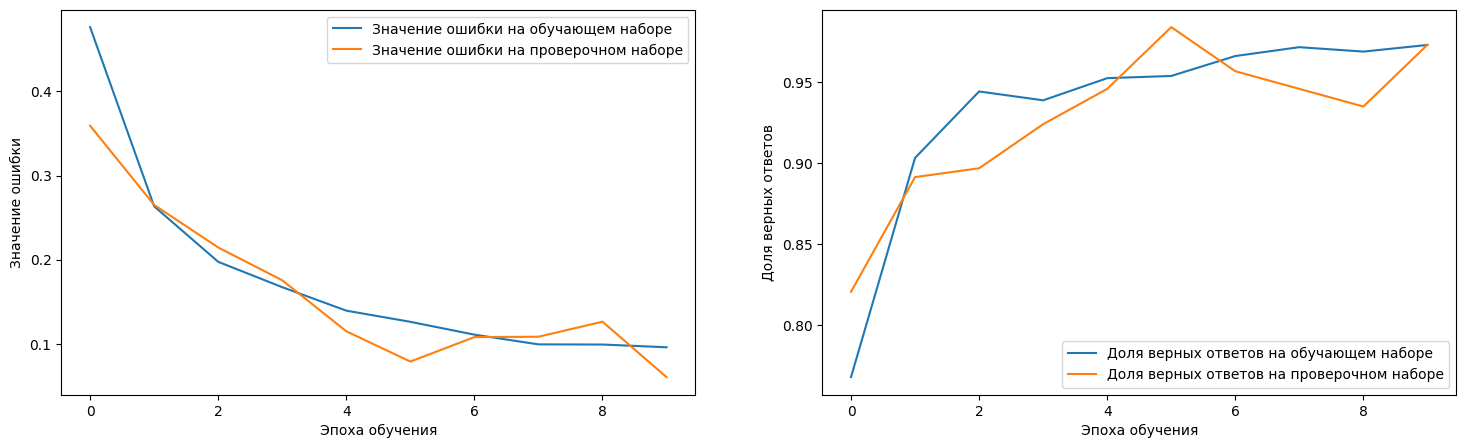

In [35]:
# Отрисовка результата

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()